In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df_hiring = pd.read_csv('hiring.csv')
df_1000 = pd.read_csv('1000_Companies.csv')

### Replace the experience containing text with numbers

In [ ]:
text_to_num = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15,
    'sixteen': 16, 'seventeen': 17, 'eighteen': 18, 'nineteen': 19, 'twenty': 20,
    'twenty-one': 21, 'twenty-two': 22, 'twenty-three': 23, 'twenty-four': 24, 'twenty-five': 25
}
df_hiring['experience'] = df_hiring['experience'].map(text_to_num)

In [ ]:
df_hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


### Replace null values with mean

In [ ]:
df_hiring['experience'].fillna(df_hiring['experience'].mean(), inplace=True)
df_hiring['test_score(out of 10)'].fillna(df_hiring['test_score(out of 10)'].mean(), inplace=True)
df_hiring.head()

<ipython-input-5-7460eea796d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hiring['experience'].fillna(df_hiring['experience'].mean(), inplace=True)
<ipython-input-5-7460eea796d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.0,9,50000
1,6.333333,8.0,6,45000
2,5.000000,6.0,7,60000
3,2.000000,10.0,10,65000
4,7.000000,9.0,6,70000


### Train the model and make predictions

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df_hiring.drop('salary($)',axis='columns'),df_hiring['salary($)'])

LinearRegression()

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86424.66795913])

## For 1000 companies dataset

### Scale the training columns and encode categorical variable

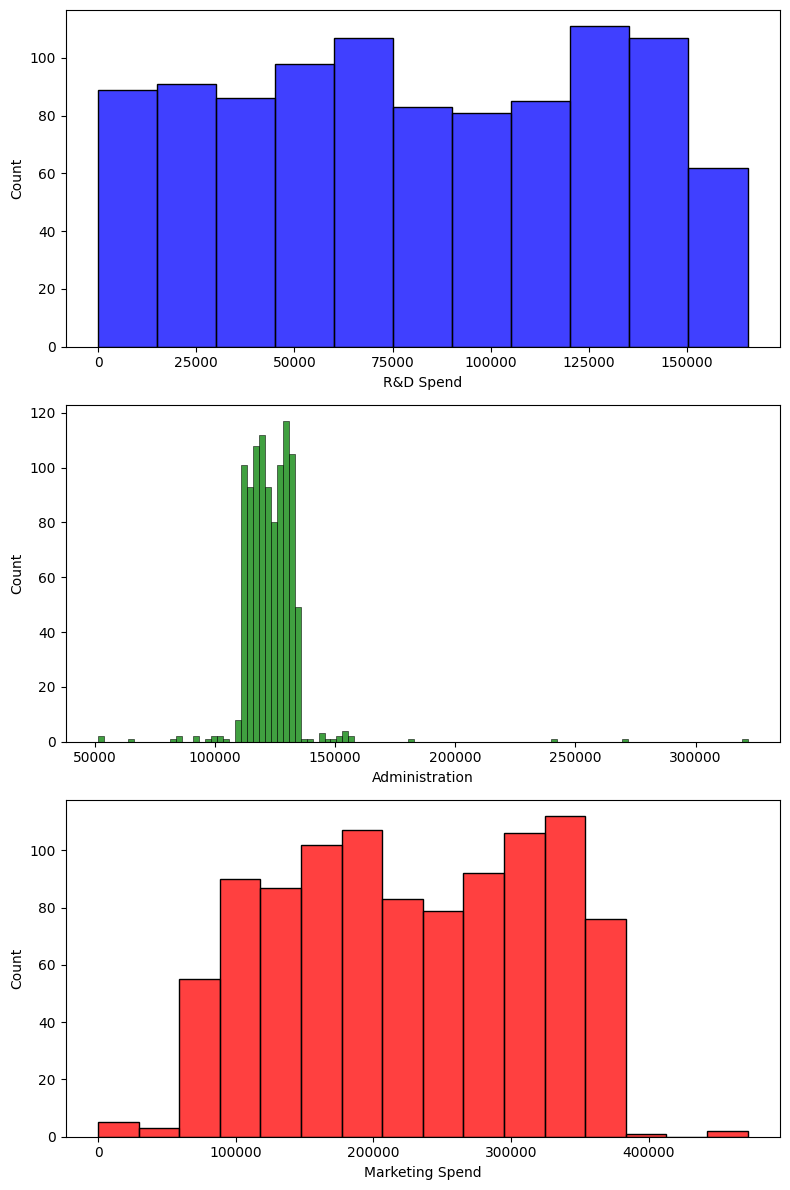

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column of subplots

# Plot KDE for each column in a separate subplot
sns.histplot(df_1000['R&D Spend'], ax=axes[0], color='blue')


sns.histplot(df_1000['Administration'], ax=axes[1], color='green')


sns.histplot(df_1000['Marketing Spend'], ax=axes[2], color='red')

# Adjust the layout
plt.tight_layout()
plt.show()

Use standard scaler for administration since it has outliers and most data is present around mean, minmax scaler for other two because of near uniform distribution.

In [ ]:
Minmax = MinMaxScaler()
Standard = StandardScaler()
Label = LabelEncoder()
df_1000['Administration'] = Standard.fit_transform(df_1000[['Administration']])
df_1000['Marketing Spend'] = Minmax.fit_transform(df_1000[['Marketing Spend']])
df_1000['R&D Spend'] = Minmax.fit_transform(df_1000[['R&D Spend']])
df_1000['State'] = Label.fit_transform(df_1000['State'])
df_1000.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,1.105197,1.000000,2,192261.83
1,0.983359,2.253692,0.940893,0,191792.06
2,0.927985,-1.730568,0.864664,1,191050.39
3,0.873136,-0.340433,0.812235,2,182901.99
4,0.859438,-2.504210,0.776136,1,166187.94


### Train a linear regression model

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df_1000.drop('Profit',axis='columns'),df_1000['Profit'])

LinearRegression()